# PIP

In [ ]:
!pip install numpy==1.23.5
!pip install gensim

In [ ]:
!pip install gensim


In [ ]:
pip install emoji==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 14.5 MB/s eta 0:00:00


# 🧠 import libraries AND load the data

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm

In [ ]:
import re
import emoji

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
url='https://raw.githubusercontent.com/amrmalkhatib/Emotional-Tone/refs/heads/master/Emotional-Tone-Dataset.csv'
df = pd.read_csv(url)
df

,ID,TWEET,LABEL
0,1,الاوليمبياد الجايه هكون لسه ف الكليه ..,none
1,2,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,anger
2,3,كتنا نيله ف حظنا الهباب xD,sadness
3,4,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,joy
4,5,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,none
...,...,...,...
10060,10061,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,sadness
10061,10062,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,surprise
10062,10063,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,none
10063,10064,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,joy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10065 entries, 0 to 10064
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10065 non-null  int64 
 1    TWEET  10064 non-null  object
 2    LABEL  10065 non-null  object
dtypes: int64(1), object(2)
memory usage: 236.0+ KB


In [ ]:
df.value_counts()

,,,count
ID,TWEET,LABEL,
1,الاوليمبياد الجايه هكون لسه ف الكليه ..,none,1
6714,خايفه من القدرات :(,fear,1
6707,: ماذا سيحدث لو تقاسمنا السهر؟ عيناك لي ولك القصائد والقمر ..,love,1
6708,تعدي ايام وهي بتحلي وبتحلي,joy,1
6709,بصراحه احنا ملناش ف الاوليمبياد خالص احسن لينا نقضيها اهلاويه زملكاويه ونشتم فبعض مفيش لعبه توحد ربنا ملعب فيها بفكر وتكتيك حتي 😡😡,sadness,1
...,...,...,...
3355,ياللي وداده ناهِب القلب والروح????,sadness,1
3356,انا من كتر الناس اللي بتكلمني علي مصر و الاسعار بقيت خايفه ارجع و الله ..,fear,1
3357,المعارضون ضد هيلاري كليتون رسمو صوره تشوه حقيقه المرشه هيلاري القصد من هذه الصوره تشتيت تفكير المرشحه CNN,anger,1


In [ ]:
print(df[' LABEL'].unique())

['none' 'anger' 'sadness' 'joy' 'surprise' 'love' 'sympathy' 'fear']


In [ ]:
df.columns = df.columns.str.strip()


# 💡Part 1: Data Preprocessing

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
# Make sure you download required resources once
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Arabic stopwords
stop_words = set(stopwords.words('arabic'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.isna().sum()

df.dropna(inplace=True)

df.columns = df.columns.str.strip()

df = df[~(df['LABEL'] == 'none')]
df

df.duplicated(subset='TWEET').sum()

# Drop duplicate rows based on the 'TWEET' column, keeping the first occurrence
df = df.drop_duplicates(subset='TWEET', keep='first')

# You can verify the change by checking for duplicates again
print(df.duplicated(subset='TWEET').sum())

df.drop(columns='ID',inplace=True)

df.shape

0


(8482, 2)

In [ ]:

# دالة التحقق من أن الكلمة عربية وطولها 3 أحرف أو أكثر
def is_clean_arabic_word(word):
    return re.fullmatch(r'[ء-ي]{3,}', word) is not None

def remove_diacritics(text):
    diacritics_pattern=re.compile(r'[\u0617-\u061A\u064B-\u0652]') # تعبر عن تشكيلة الحروف العربي من ضمة فتحة كسرةالخ
    return re.sub(diacritics_pattern,'',text)

def preprocess_arabic_text(text):

    text = re.sub(r"http\S+|@\w+|#\w+", "", text)


    text = re.sub(r"[A-Za-z0-9٠-٩]", "", text)


    text = re.sub(r'(.)\1+', r'\1', text)

    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)


    text = emoji.demojize(text, language='ar')


    text = re.sub(r"[ؤۆ]", "و", text)
    text = re.sub(r"[ء]", "", text)
    text = re.sub(r"[گڪ]", "ك", text)
    text = re.sub(r"[پچژڤ]", "", text)
    text = re.sub(r"[ۀ]", "ه", text)
    text = re.sub("ى", "ي", text)

    text = remove_diacritics(text)




    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub(r"[هة]", "ه", text)

    text = re.sub(r"([!?؟])", r" \1 ", text)  # فصلهم عن الكلمات
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text)


    words =word_tokenize(text)
    cleaned_words = [word for word in words if is_clean_arabic_word(word) and word not in stop_words]


    text = ' '.join(cleaned_words)

    return text

df['cleaned_text'] = df['TWEET'].astype(str).apply(preprocess_arabic_text)

df

,TWEET,LABEL,cleaned_text
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,anger,عجز الموازنه وصل الناتج المحلي يعني لسه اقل نف...
2,كتنا نيله ف حظنا الهباب xD,sadness,كتنا نيله حظنا الهباب
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,joy,جميعنا نريد تحقيق اهدافنا تونس تالقت حراسه المرمي
5,دلوقتي عندها اربع سنين .... ومحدش يقدر يكلمها ...,surprise,دلوقتي عندها اربع سنين ومحدش يقدر يكلمها اله
6,الحب يسلبها كيدها يرجعها الي براءتها الاولي وي...,love,الحب يسلبها كيدها يرجعها الي براتها الاولي ويد...
...,...,...,...
10059,خايفه نبدا مذاكره ونعمل حاجات مفيده ونسيب الحا...,fear,خايفه نبدا مذاكره ونعمل حاجات مفيده ونسيب الحا...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,sadness,يلا جماعه حفله عمرو دياب خلصت نريح شويه ونبدا ...
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,surprise,ايه وجه مندهش اوزيل قلب احمر
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,joy,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس


# 💡 Part 2: Text Representation Techniques

# ✅Bag-of-Words (BoW)


In [ ]:
vectorizer = CountVectorizer(max_features=5000,
      token_pattern=r"(?u)\b[^\d\W]+\b",
      ngram_range=(1, 2)
    )
x_bow =vectorizer.fit_transform(df['cleaned_text'])

bow_array=x_bow.toarray()

feature_names = vectorizer.get_feature_names_out()
df_bow = pd.DataFrame(bow_array, columns=feature_names)
df_bow

,ابتديت,ابتسامتك,ابتسامه,ابتسم,ابحث,ابدا,ابداع,ابراهيم,ابسط,ابطال,...,يوفقهم,يوفقهم وينصرهم,يول,يولمني,يوم,يوم الجمعه,يوم القيامه,يوما,يومين,يونس
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#✅TF-IDF

In [ ]:
tfidf=TfidfVectorizer(token_pattern=r"(?u)\b[^\d\W]+\b",
                      max_features=5000
)
x_tfidf=tfidf.fit_transform(df['cleaned_text'])


tfidf_array=x_tfidf.toarray()
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_array, columns=feature_names)
df_tfidf

,ابتديت,ابتسامتك,ابتسامه,ابتسم,ابحث,ابدا,ابداع,ابراهيم,ابسط,ابطال,...,يوفقهم,يوفقهم وينصرهم,يول,يولمني,يوم,يوم الجمعه,يوم القيامه,يوما,يومين,يونس
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#✅Word2Vec (preferably pre-trained like AraVec or fastText)


In [ ]:
# Train Word2Vec
tokenized_docs = [word_tokenize(doc) for doc in df['cleaned_text']]
w2v_model = Word2Vec(sentences=tokenized_docs,
                     vector_size=300,
                     min_count=1,
                     window=5,
                     workers=4,
                     sg=1,
                     epochs=30
                     )

# Function to average word vectors
def get_avg_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Get sentence vectors
x_w2v = np.array([get_avg_vector(tokens, w2v_model) for tokens in tokenized_docs])


# ✅AraBert

In [ ]:
# 1. تحميل النموذج و Tokenizer
model_name = "aubmindlab/bert-base-arabertv02"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [ ]:
# 2. تحويل الجمل إلى Embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # استخدام [CLS] token (أول توكن) كتمثيل للجملة
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # shape: (1, 768)
    return cls_embedding.squeeze().numpy()  # إلى numpy


In [ ]:
# 4. تطبيق النموذج على كل الجمل
embeddings = []
for tweet in tqdm(df['cleaned_text']):
    emb = get_bert_embedding(tweet)
    embeddings.append(emb)

# 5. تحويل إلى numpy array
X_bert = np.vstack(embeddings)  # shape = (num_samples, 768)

print("شكل تمثيل AraBERT:", X_bert.shape)

100%|██████████| 8482/8482 [22:59<00:00,  6.15it/s]


شكل تمثيل AraBERT: (8482, 768)


#   💡OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

def oversample_data(X, y):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(df['LABEL'])
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y_encoded)
    return X_resampled, y_resampled

#💡Part 3:Classical Machine Learning Models

* 📌Split Data

In [ ]:
def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

* 📌Train Naive Bayes

In [ ]:
def train_naive_bayes(X_train, X_test, y_train, y_test):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ Naive Bayes")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

In [ ]:
def train_naive_bayes_Gaussian(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ GaussianNB")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

* 📌 Train Svm

In [ ]:
def train_svm(X_train, X_test, y_train, y_test):
    model = LinearSVC(C=1.0,loss='squared_hinge')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ SVM (RBF)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

* 📌 Train Decision Tree

In [ ]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_depth=10,criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ Decision Tree")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

* 📌 Train Random Forest

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(max_depth=20,n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ Random Forest")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

* 📌Train Adaoost

In [ ]:
def train_adaboost(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n→ AdaBoost")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Report:\n", classification_report(y_test, y_pred))

# ✅run all Classifier

In [ ]:
def run_all_classifiers(X, y, skip_nb=False):
    X,y=oversample_data(X, y)
    X_train, X_test, y_train, y_test = split_data(X, y)

    if not skip_nb:
        train_naive_bayes(X_train, X_test, y_train, y_test)
    else:
        train_naive_bayes_Gaussian(X_train, X_test, y_train, y_test)
    train_svm(X_train, X_test, y_train, y_test)
    train_decision_tree(X_train, X_test, y_train, y_test)
    train_random_forest(X_train, X_test, y_train, y_test)
    train_adaboost(X_train, X_test, y_train, y_test)


In [ ]:
y=df['LABEL']

In [ ]:
run_all_classifiers(x_tfidf, y)


→ Naive Bayes
Accuracy: 0.6810515873015873
Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.62       294
           1       0.73      0.90      0.81       277
           2       0.69      0.57      0.62       289
           3       0.72      0.80      0.76       293
           4       0.65      0.34      0.45       313
           5       0.58      0.71      0.64       278
           6       0.72      0.90      0.80       272

    accuracy                           0.68      2016
   macro avg       0.68      0.69      0.67      2016
weighted avg       0.68      0.68      0.67      2016


→ SVM (RBF)
Accuracy: 0.7366071428571429
Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       294
           1       0.98      0.92      0.95       277
           2       0.61      0.66      0.64       289
           3       0.77      0.77      0.77       293
           4       0.62     

In [ ]:
run_all_classifiers(x_bow, y)


→ Naive Bayes
Accuracy: 0.6770833333333334
Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       294
           1       0.76      0.90      0.82       277
           2       0.68      0.52      0.59       289
           3       0.71      0.80      0.75       293
           4       0.59      0.38      0.46       313
           5       0.61      0.68      0.65       278
           6       0.74      0.89      0.81       272

    accuracy                           0.68      2016
   macro avg       0.67      0.68      0.67      2016
weighted avg       0.67      0.68      0.67      2016


→ SVM (RBF)
Accuracy: 0.7162698412698413
Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       294
           1       0.96      0.91      0.93       277
           2       0.59      0.65      0.62       289
           3       0.75      0.75      0.75       293
           4       0.59     

In [ ]:
run_all_classifiers(x_w2v, y, skip_nb=True)  # Word2Vec → skip Naive Bayes


→ GaussianNB
Accuracy: 0.4895833333333333
Report:
               precision    recall  f1-score   support

           0       0.34      0.72      0.46       294
           1       0.69      0.71      0.70       277
           2       0.55      0.19      0.29       289
           3       0.61      0.68      0.64       293
           4       0.23      0.11      0.15       313
           5       0.41      0.43      0.42       278
           6       0.70      0.63      0.66       272

    accuracy                           0.49      2016
   macro avg       0.50      0.50      0.47      2016
weighted avg       0.50      0.49      0.47      2016


→ SVM (RBF)
Accuracy: 0.6259920634920635
Report:
               precision    recall  f1-score   support

           0       0.52      0.67      0.59       294
           1       0.94      0.88      0.91       277
           2       0.51      0.49      0.50       289
           3       0.65      0.71      0.68       293
           4       0.56      

In [ ]:
run_all_classifiers(X_bert, y, skip_nb=True)


→ GaussianNB
Accuracy: 0.49603174603174605
Report:
               precision    recall  f1-score   support

           0       0.46      0.58      0.51       294
           1       0.63      0.63      0.63       277
           2       0.43      0.39      0.41       289
           3       0.56      0.74      0.64       293
           4       0.37      0.13      0.19       313
           5       0.35      0.47      0.40       278
           6       0.68      0.56      0.61       272

    accuracy                           0.50      2016
   macro avg       0.50      0.50      0.48      2016
weighted avg       0.49      0.50      0.48      2016


→ SVM (RBF)
Accuracy: 0.6607142857142857
Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       294
           1       0.80      0.84      0.82       277
           2       0.60      0.58      0.59       289
           3       0.69      0.72      0.70       293
           4       0.56     

# ✅GridSearch

# 💡 Part 4: Feed-Forward Neural Network (FNN)

In [ ]:
!pip uninstall -y tensorflow keras keras-nightly keras-Preprocessing keras-vis h5py


Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
Found existing installation: h5py 3.13.0
Uninstalling h5py-3.13.0:
  Successfully uninstalled h5py-3.13.0


In [ ]:
!pip install tensorflow==2.12.0


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have te

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models,datasets

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout





* 📌Train Test

In [ ]:
X=df['cleaned_text']
y=df['LABEL']

In [ ]:
def FNN_run(X,y):
    # 📌 Train
    X,y=oversample_data(X, y)
    X_train, X_test, y_train, y_test = split_data(X, y)

    label_encoder = LabelEncoder()
    y_train_enc = label_encoder.fit_transform(y_train)
    y_test_enc = label_encoder.transform(y_test)

    num_classes = len(np.unique(y_train_enc))
    y_train_oh = to_categorical(y_train_enc, num_classes)
    y_test_oh = to_categorical(y_test_enc, num_classes)
    #📌 Model
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

    history = model.fit(
        X_train, y_train_oh,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=1
    )
    #📌Evlauate
    loss, acc = model.evaluate(X_test, y_test_oh, verbose=0)
    print(f"\n✅ FNN Accuracy on BoW: {acc:.2f}")
    #📌Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

* 📌label encoder

Epoch 1/20
227/227 [==============================] - 7s 25ms/step - loss: 2.1404 - accuracy: 0.3770 - val_loss: 1.5637 - val_accuracy: 0.5700
Epoch 2/20
227/227 [==============================] - 5s 21ms/step - loss: 1.5059 - accuracy: 0.5812 - val_loss: 1.4340 - val_accuracy: 0.6803
Epoch 3/20
227/227 [==============================] - 8s 34ms/step - loss: 1.3844 - accuracy: 0.6749 - val_loss: 1.4101 - val_accuracy: 0.6877
Epoch 4/20
227/227 [==============================] - 8s 35ms/step - loss: 1.3159 - accuracy: 0.7288 - val_loss: 1.3890 - val_accuracy: 0.6989
Epoch 5/20
227/227 [==============================] - 9s 37ms/step - loss: 1.2749 - accuracy: 0.7549 - val_loss: 1.3812 - val_accuracy: 0.7274
Epoch 6/20
227/227 [==============================] - 9s 38ms/step - loss: 1.2164 - accuracy: 0.7892 - val_loss: 1.3924 - val_accuracy: 0.7249
Epoch 7/20
227/227 [==============================] - 7s 29ms/step - loss: 1.1967 - accuracy: 0.7970 - val_loss: 1.3978 - val_accuracy: 0.7175

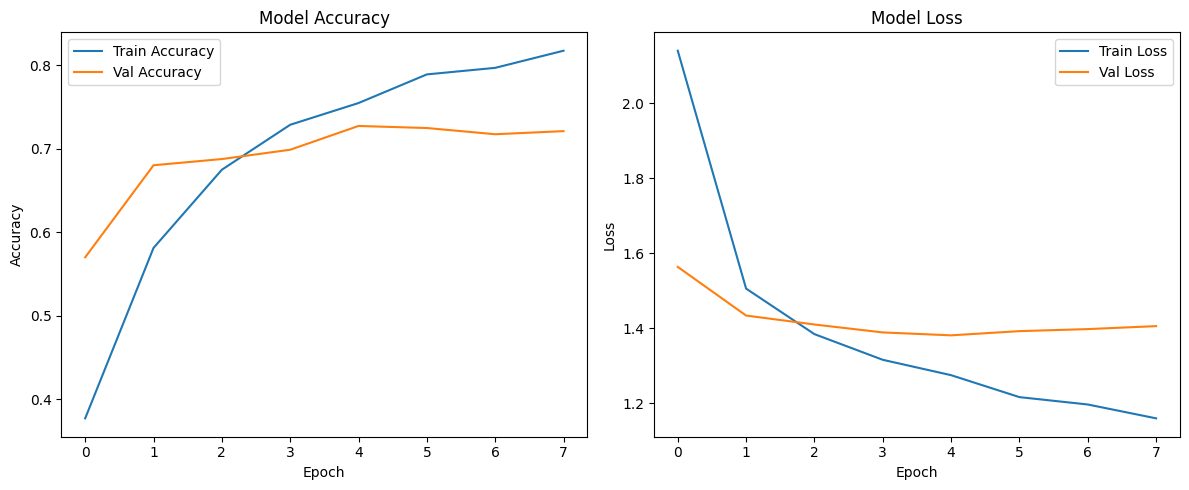

In [ ]:
FNN_run(x_tfidf,y)

Epoch 1/20
227/227 [==============================] - 3s 7ms/step - loss: 2.2522 - accuracy: 0.4615 - val_loss: 1.6115 - val_accuracy: 0.5465
Epoch 2/20
227/227 [==============================] - 2s 7ms/step - loss: 1.5567 - accuracy: 0.5513 - val_loss: 1.4071 - val_accuracy: 0.5725
Epoch 3/20
227/227 [==============================] - 2s 9ms/step - loss: 1.4114 - accuracy: 0.5683 - val_loss: 1.3459 - val_accuracy: 0.5861
Epoch 4/20
227/227 [==============================] - 1s 5ms/step - loss: 1.3604 - accuracy: 0.5726 - val_loss: 1.3103 - val_accuracy: 0.5824
Epoch 5/20
227/227 [==============================] - 1s 5ms/step - loss: 1.3345 - accuracy: 0.5719 - val_loss: 1.2956 - val_accuracy: 0.5861
Epoch 6/20
227/227 [==============================] - 1s 5ms/step - loss: 1.3171 - accuracy: 0.5767 - val_loss: 1.2777 - val_accuracy: 0.5799
Epoch 7/20
227/227 [==============================] - 1s 5ms/step - loss: 1.2980 - accuracy: 0.5812 - val_loss: 1.2498 - val_accuracy: 0.6047
Epoch 

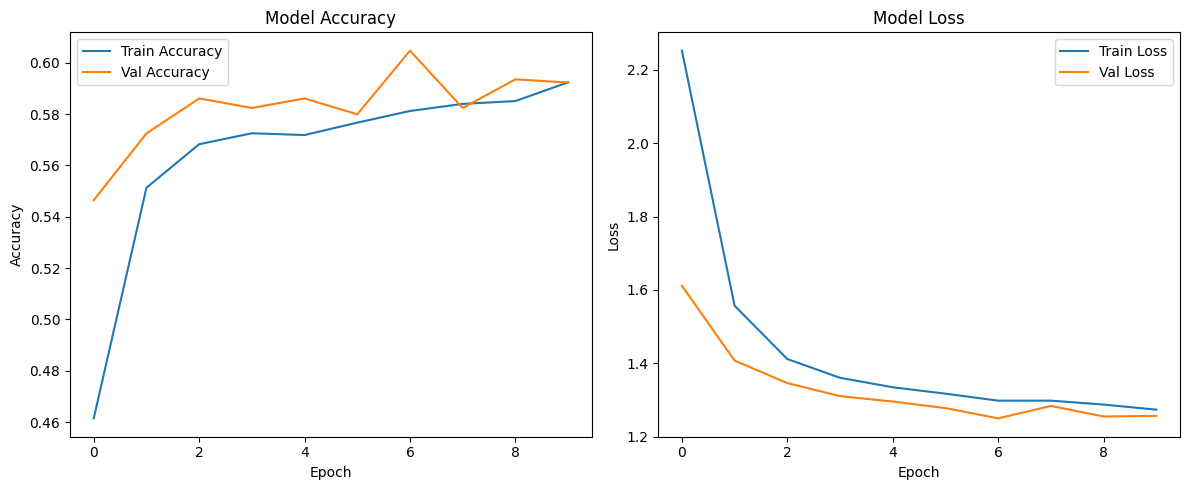

In [ ]:
FNN_run(x_w2v,y)

# 💡LSTM

In [ ]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec # Import Word2Vec
import nltk

In [ ]:
docs=df['cleaned_text']
y=df['LABEL']


nltk.download('punkt_tab', quiet=True)
nltk.download('punkt', quiet=True)

tokenized_docs = [word_tokenize(doc) for doc in docs]


tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
sequences = tokenizer.texts_to_sequences(docs)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1


max_len = max(len(seq) for seq in sequences)
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post')


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_cat = to_categorical(y)


if 'w2v_model' not in globals():
         print("Training Word2Vec model as it was not found.")
         # ✅ تدريب Word2Vec
         w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=2, sg=1, epochs=30)

embedding_dim = w2v_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_cat, test_size=0.2, random_state=5)


if 'embedding_dim' in locals():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_len,
                        trainable=False))
    model.add(Bidirectional(LSTM(128, return_sequences=False, recurrent_dropout=0.2)))
    model.add(Dropout(0.5))  # Dropout إضافي بعد LSTM
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))  # Dropout إضافي
    model.add(Dense(y_cat.shape[1], activation='softmax'))


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)


    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=5,
                        batch_size=64,
                        callbacks=[early_stop],
                        verbose=1)


    loss, acc = model.evaluate(X_test, y_test)
    print(f"\n✅ LSTM Accuracy: {acc:.2f}")
else:
    print("\n❌ Cannot build the model because embedding_dim was not defined due to missing w2v_model.")

Epoch 1/5
96/96 [==============================] - 103s 954ms/step - loss: 1.4983 - accuracy: 0.4535 - val_loss: 1.1961 - val_accuracy: 0.5641
Epoch 2/5
96/96 [==============================] - 58s 602ms/step - loss: 1.2174 - accuracy: 0.5537 - val_loss: 1.1515 - val_accuracy: 0.5950
Epoch 3/5
96/96 [==============================] - 52s 542ms/step - loss: 1.1477 - accuracy: 0.5868 - val_loss: 1.1093 - val_accuracy: 0.5700
Epoch 4/5
96/96 [==============================] - 52s 540ms/step - loss: 1.0961 - accuracy: 0.6035 - val_loss: 1.0802 - val_accuracy: 0.6097
Epoch 5/5
54/54 [==============================] - 4s 73ms/step - loss: 1.0352 - accuracy: 0.6158

✅ LSTM Accuracy: 0.62
